In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Dell\Desktop\DBT\uber-raw-data-apr14.csv")

In [4]:
df.head()

,Date/Time,Lat,Lon,Base
0,04-01-2014 00:11,40.7690,-73.9549,B02512
1,04-01-2014 00:17,40.7267,-74.0345,B02512
2,04-01-2014 00:21,40.7316,-73.9873,B02512
3,04-01-2014 00:28,40.7588,-73.9776,B02512
4,04-01-2014 00:33,40.7594,-73.9722,B02512


In [6]:
df['Date/Time'] = df['Date/Time'].map(pd.to_datetime)

In [7]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [8]:
def get_dom(dt):
    return dt.day
df['dom'] = df['Date/Time'].map(get_dom)

In [9]:
df.head()

,Date/Time,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [11]:
def get_weekday(dt):
    return dt.weekday()
df['weekday'] = df['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour
df['hour'] = df['Date/Time'].map(get_hour)

In [12]:
df.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Frequency by dom uber')

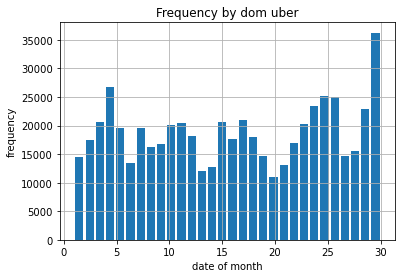

In [19]:
df.hist(column='dom',bins=30,rwidth=0.8)
plt.xlabel('date of month')
plt.ylabel('frequency')
plt.title('Frequency by dom uber')

In [20]:
def count_rows(rows):
    return len(rows)
by_date= df.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

<BarContainer object of 30 artists>

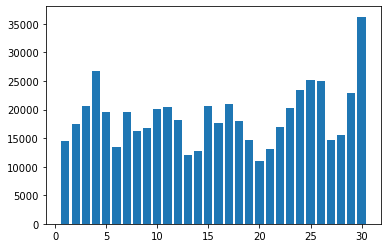

In [22]:
plt.bar(range(1,31),by_date)

In [23]:
by_date_sorted = by_date.sort_values()
by_date_sorted


dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

Text(0.5, 1.0, 'Frequency by dom uber')

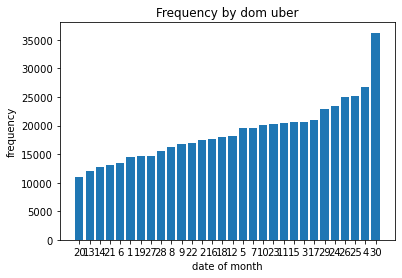

In [25]:
plt.bar(range(1,31),by_date_sorted)
plt.xticks(range(1,31),by_date_sorted.index)
plt.xlabel('date of month')
plt.ylabel('frequency')
plt.title('Frequency by dom uber')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209EC67B048>]],
      dtype=object)

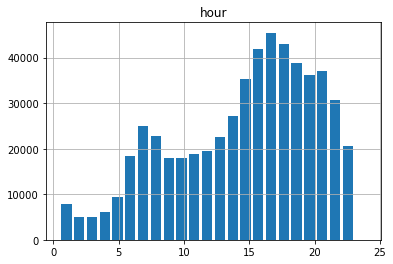

In [26]:
df.hist(column='hour',bins=24,rwidth=0.8,range=(0.5,24))

([<matplotlib.axis.XTick at 0x209ecd2ad30>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

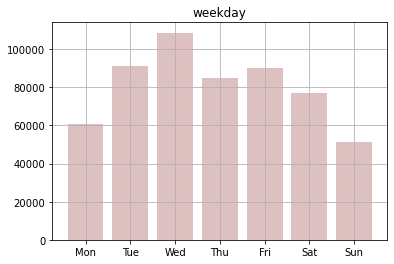

In [27]:
df.hist(column='weekday',bins=7,rwidth=0.8,range=(-0.5,6.5),color='#AA6666', alpha=.4)
plt.xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split())

In [28]:
by_cross = df.groupby('weekday hour'.split()).apply(count_rows).unstack()

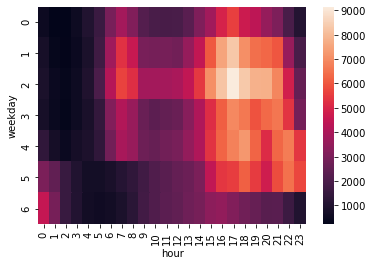

In [29]:
sns.heatmap(by_cross)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209ECEE41D0>]],
      dtype=object)

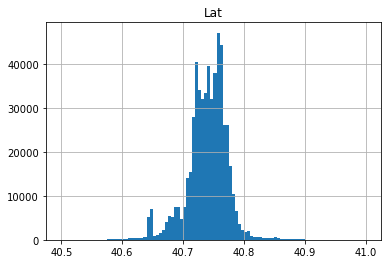

In [31]:
df.hist(column='Lat',bins=100,range=(40.5,41))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209ED14DE10>]],
      dtype=object)

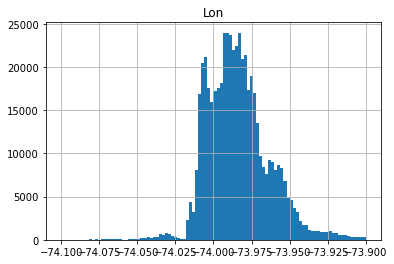

In [32]:
df.hist(column='Lon',bins=100,range = (-74.1, -73.9))